In [ ]:
!pip install pandas as pd



Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as


In [ ]:
!pip install numpy as np
!pip install matplotlib.pyplot as plt


ERROR: Could not find a version that satisfies the requirement as (from versions: none)

[notice] A new release of pip is available: 25.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for as
ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)

[notice] A new release of pip is available: 25.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for matplotlib.pyplot


  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-

In [5]:
!pip install scikit-learn


[notice] A new release of pip is available: 25.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import warnings
warnings.filterwarnings('ignore')

In [1]:
import pandas as pd

In [7]:

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')


print("="*70)
print("CUSTOMER CHURN ANALYSIS - TELECOMMUNICATIONS COMPANY")
print("="*70)

CUSTOMER CHURN ANALYSIS - TELECOMMUNICATIONS COMPANY


In [12]:
!pip install openpyxl


   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpy


[notice] A new release of pip is available: 25.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
df = pd.read_excel("Churn sample data.xlsx")

In [14]:
print(f"Dataset contains {df.shape[0]:,} customers and {df.shape[1]} features")
print(f"\nColumn names:\n{df.columns.tolist()}")

Dataset contains 7,043 customers and 21 features

Column names:
['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [15]:

# ============================================================================
# STEP 2: DATA QUALITY CHECK
# ============================================================================
print("\n\n🔍 STEP 2: Data Quality Check\n")

print("Missing Values:")
missing = df.isnull().sum()
if missing.sum() > 0:
    print(missing[missing > 0])
    print(f"\n⚠️ TotalCharges has {missing['TotalCharges']} missing values")
    print("Solution: We'll remove these rows (they represent customers with 0 tenure)")
    df = df.dropna()
else:
    print("✓ No missing values found")



🔍 STEP 2: Data Quality Check

Missing Values:
TotalCharges    11
dtype: int64

⚠️ TotalCharges has 11 missing values
Solution: We'll remove these rows (they represent customers with 0 tenure)




🎯 STEP 3: Understanding Customer Churn (Our Target)

Customers who left (Churned): 1,869 (26.6%)
Customers who stayed: 5,163 (73.4%)

💡 Insight: About 1 in 4 customers are leaving the company!


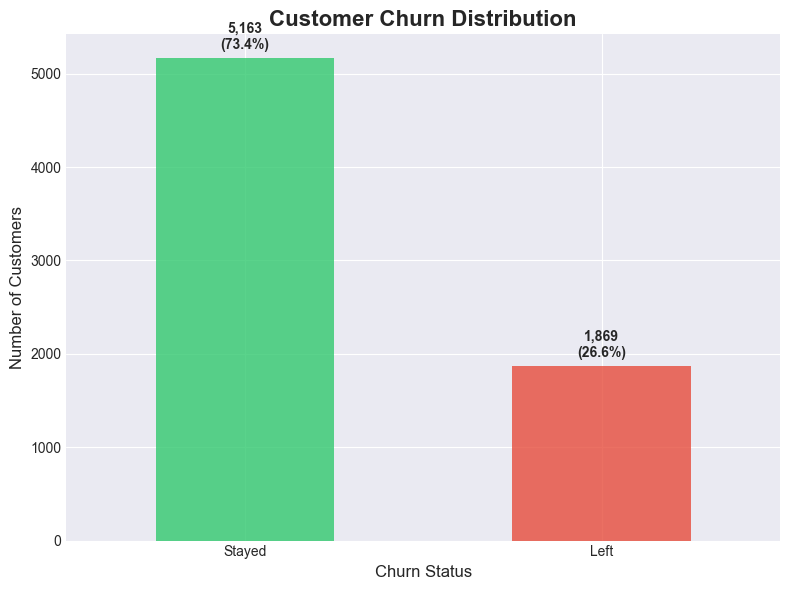

In [18]:
# ============================================================================
# STEP 3: TARGET VARIABLE ANALYSIS
# ============================================================================
print("\n\n🎯 STEP 3: Understanding Customer Churn (Our Target)\n")

churn_counts = df['Churn'].value_counts()
churn_rate = (churn_counts['Yes'] / len(df)) * 100

print(f"Customers who left (Churned): {churn_counts['Yes']:,} ({churn_rate:.1f}%)")
print(f"Customers who stayed: {churn_counts['No']:,} ({100-churn_rate:.1f}%)")
print(f"\n💡 Insight: About 1 in 4 customers are leaving the company!")

# Visualization
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
colors = ["#31c96e", '#e74c3c']
churn_counts.plot(kind='bar', ax=ax, color=colors, alpha=0.8)
ax.set_title('Customer Churn Distribution', fontsize=16, fontweight='bold')
ax.set_xlabel('Churn Status', fontsize=12)
ax.set_ylabel('Number of Customers', fontsize=12)
ax.set_xticklabels(['Stayed', 'Left'], rotation=0)
for i, v in enumerate(churn_counts):
    ax.text(i, v + 100, f'{v:,}\n({v/len(df)*100:.1f}%)', ha='center', fontweight='bold')
plt.tight_layout()


In [19]:
# ============================================================================
# STEP 4: CUSTOMER DEMOGRAPHICS ANALYSIS
# ============================================================================
print("\n\n👥 STEP 4: Who Are Our Customers?\n")

# Gender distribution
print("Gender Distribution:")
print(df['gender'].value_counts())

# Senior Citizens
senior_pct = (df['SeniorCitizen'].sum() / len(df)) * 100
print(f"\nSenior Citizens: {df['SeniorCitizen'].sum():,} ({senior_pct:.1f}%)")

# Partnership and Dependents
partner_pct = (df['Partner'].value_counts()['Yes'] / len(df)) * 100
dependents_pct = (df['Dependents'].value_counts()['Yes'] / len(df)) * 100
print(f"Have Partner: {partner_pct:.1f}%")
print(f"Have Dependents: {dependents_pct:.1f}%")



👥 STEP 4: Who Are Our Customers?

Gender Distribution:
gender
Male      3549
Female    3483
Name: count, dtype: int64

Senior Citizens: 1,142 (16.2%)
Have Partner: 48.3%
Have Dependents: 29.8%


In [20]:
# ============================================================================
# STEP 5: SERVICE USAGE PATTERNS
# ============================================================================
print("\n\n📡 STEP 5: What Services Do Customers Use?\n")

# Internet Service
print("Internet Service Type:")
print(df['InternetService'].value_counts())

# Contract Type
print("\nContract Type:")
print(df['Contract'].value_counts())

# Payment Method
print("\nPayment Method:")
print(df['PaymentMethod'].value_counts())



📡 STEP 5: What Services Do Customers Use?

Internet Service Type:
InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64

Contract Type:
Contract
Month-to-month    3875
Two year          1685
One year          1472
Name: count, dtype: int64

Payment Method:
PaymentMethod
Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: count, dtype: int64


In [21]:
# ============================================================================
# STEP 6: FINANCIAL ANALYSIS
# ============================================================================
print("\n\n💰 STEP 6: Financial Patterns\n")

print(f"Average Monthly Charges: ${df['MonthlyCharges'].mean():.2f}")
print(f"Average Total Charges: ${df['TotalCharges'].mean():.2f}")
print(f"Average Customer Tenure: {df['tenure'].mean():.1f} months")

# Churn by charges
churned = df[df['Churn'] == 'Yes']
stayed = df[df['Churn'] == 'No']

print(f"\nChurned customers pay on average: ${churned['MonthlyCharges'].mean():.2f}/month")
print(f"Retained customers pay on average: ${stayed['MonthlyCharges'].mean():.2f}/month")
print(f"💡 Insight: Churned customers pay ${churned['MonthlyCharges'].mean() - stayed['MonthlyCharges'].mean():.2f} MORE per month!")



💰 STEP 6: Financial Patterns

Average Monthly Charges: $64.80
Average Total Charges: $2283.30
Average Customer Tenure: 32.4 months

Churned customers pay on average: $74.44/month
Retained customers pay on average: $61.31/month
💡 Insight: Churned customers pay $13.13 MORE per month!




📈 STEP 7: What Causes Customers to Leave?



[Text(0, 0, 'Bank transfer (automatic)'),
 Text(1, 0, 'Credit card (automatic)'),
 Text(2, 0, 'Electronic check'),
 Text(3, 0, 'Mailed check')]

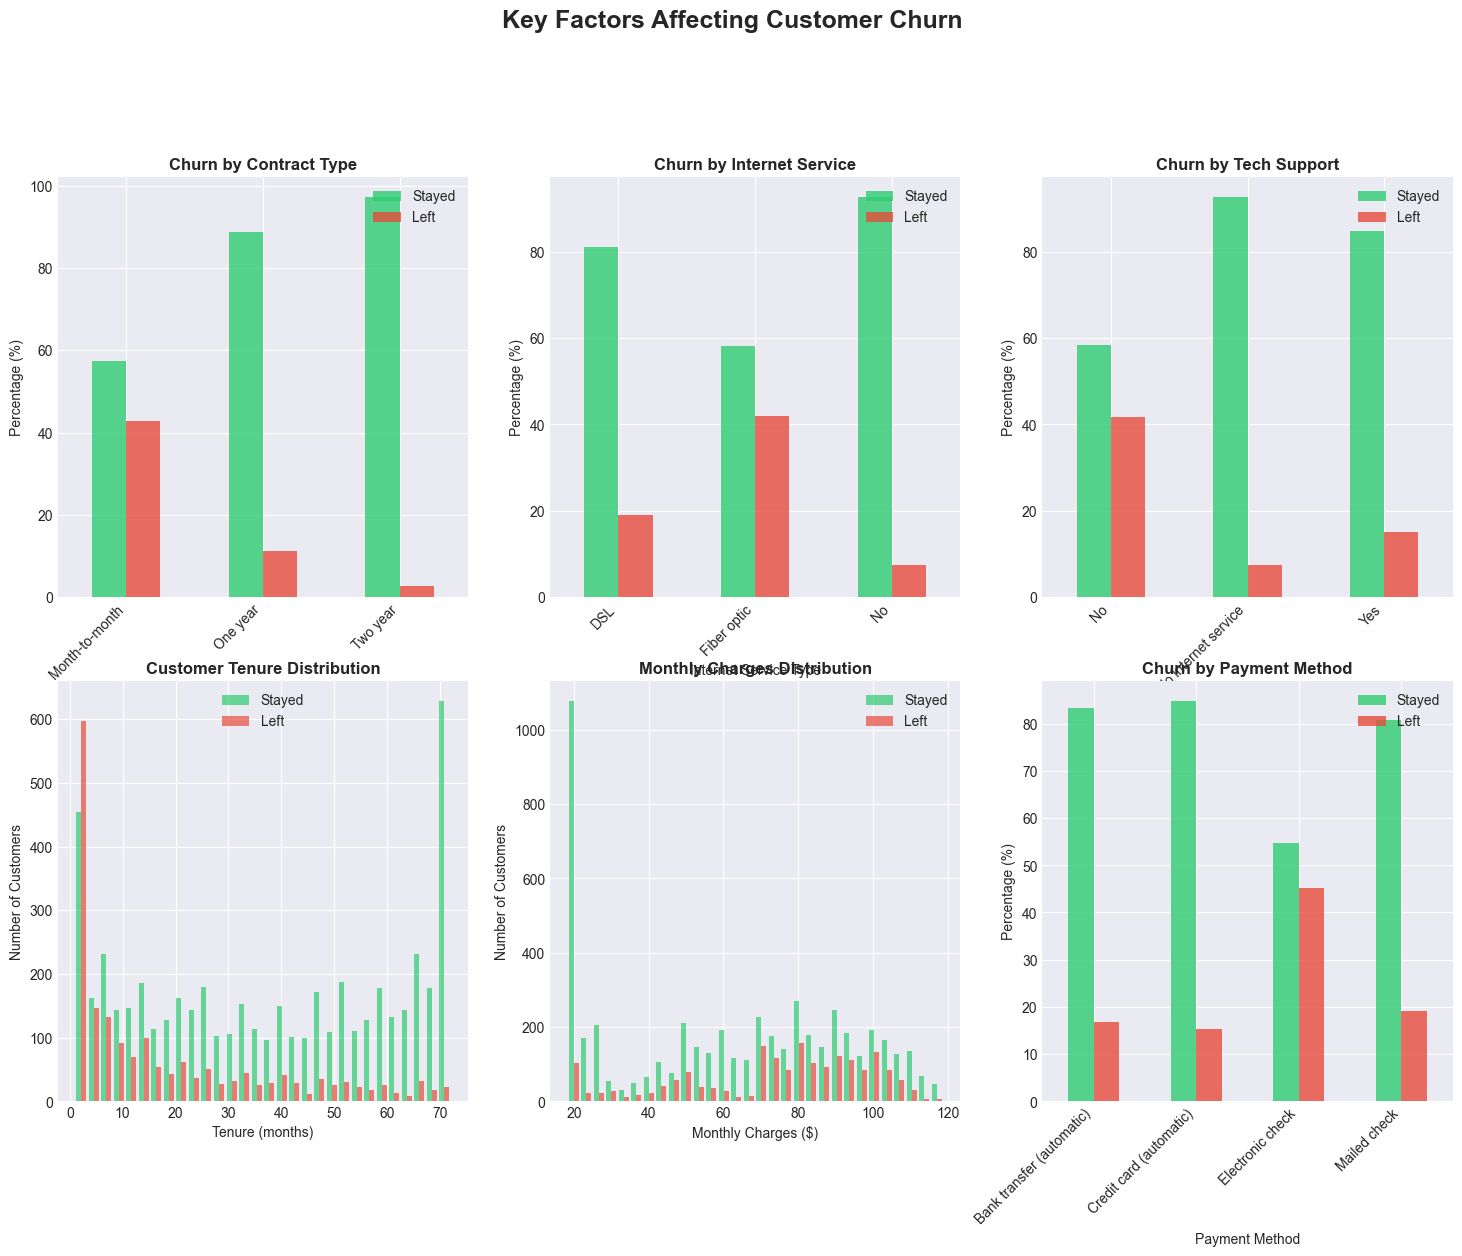

In [27]:
# ============================================================================
# STEP 7: KEY CHURN DRIVERS - VISUAL ANALYSIS
# ============================================================================
print("\n\n📈 STEP 7: What Causes Customers to Leave?\n")

# Create visualizations for key factors
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Key Factors Affecting Customer Churn', fontsize=18, fontweight='bold', y=1.02)

# 1. Contract Type
contract_churn = pd.crosstab(df['Contract'], df['Churn'], normalize='index') * 100
contract_churn.plot(kind='bar', ax=axes[0, 0], color=['#2ecc71', '#e74c3c'], alpha=0.8)
axes[0, 0].set_title('Churn by Contract Type', fontweight='bold')
axes[0, 0].set_ylabel('Percentage (%)')
axes[0, 0].set_xlabel('Contract Type')
axes[0, 0].legend(['Stayed', 'Left'], loc='upper right')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45, ha='right')

 #2. Internet Service
internet_churn = pd.crosstab(df['InternetService'], df['Churn'], normalize='index') * 100
internet_churn.plot(kind='bar', ax=axes[0, 1], color=['#2ecc71', '#e74c3c'], alpha=0.8)
axes[0, 1].set_title('Churn by Internet Service', fontweight='bold')
axes[0, 1].set_ylabel('Percentage (%)')
axes[0, 1].set_xlabel('Internet Service Type')
axes[0, 1].legend(['Stayed', 'Left'], loc='upper right')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45, ha='right')

# 3. Tech Support
tech_churn = pd.crosstab(df['TechSupport'], df['Churn'], normalize='index') * 100
tech_churn.plot(kind='bar', ax=axes[0, 2], color=['#2ecc71', '#e74c3c'], alpha=0.8)
axes[0, 2].set_title('Churn by Tech Support', fontweight='bold')
axes[0, 2].set_ylabel('Percentage (%)')
axes[0, 2].set_xlabel('Tech Support Status')
axes[0, 2].legend(['Stayed', 'Left'], loc='upper right')
axes[0, 2].set_xticklabels(axes[0, 2].get_xticklabels(), rotation=45, ha='right')

# 4. Tenure Distribution
axes[1, 0].hist([stayed['tenure'], churned['tenure']], bins=30, label=['Stayed', 'Left'], 
                color=['#2ecc71', '#e74c3c'], alpha=0.7)
axes[1, 0].set_title('Customer Tenure Distribution', fontweight='bold')
axes[1, 0].set_xlabel('Tenure (months)')
axes[1, 0].set_ylabel('Number of Customers')
axes[1, 0].legend()

# 5. Monthly Charges
axes[1, 1].hist([stayed['MonthlyCharges'], churned['MonthlyCharges']], bins=30, 
                label=['Stayed', 'Left'], color=['#2ecc71', '#e74c3c'], alpha=0.7)
axes[1, 1].set_title('Monthly Charges Distribution', fontweight='bold')
axes[1, 1].set_xlabel('Monthly Charges ($)')
axes[1, 1].set_ylabel('Number of Customers')
axes[1, 1].legend()

# 6. Payment Method
payment_churn = pd.crosstab(df['PaymentMethod'], df['Churn'], normalize='index') * 100
payment_churn.plot(kind='bar', ax=axes[1, 2], color=['#2ecc71', '#e74c3c'], alpha=0.8)
axes[1, 2].set_title('Churn by Payment Method', fontweight='bold')
axes[1, 2].set_ylabel('Percentage (%)')
axes[1, 2].set_xlabel('Payment Method')
axes[1, 2].legend(['Stayed', 'Left'], loc='upper right')
axes[1, 2].set_xticklabels(axes[1, 2].get_xticklabels(), rotation=45, ha='right')

In [28]:

# ============================================================================
# STEP 8: KEY INSIGHTS SUMMARY
# ============================================================================
print("\n\n💡 STEP 8: Key Insights from EDA\n")

insights = [
    "1. Month-to-month contracts have MUCH higher churn than long-term contracts",
    "2. Fiber optic internet customers churn more than DSL customers",
    "3. Customers WITHOUT tech support are more likely to leave",
    "4. New customers (low tenure) are at highest risk of churning",
    "5. Higher monthly charges correlate with increased churn risk",
    "6. Electronic check users have higher churn rates"
]

for insight in insights:
    print(f"   {insight}")



💡 STEP 8: Key Insights from EDA

   1. Month-to-month contracts have MUCH higher churn than long-term contracts
   2. Fiber optic internet customers churn more than DSL customers
   3. Customers WITHOUT tech support are more likely to leave
   4. New customers (low tenure) are at highest risk of churning
   5. Higher monthly charges correlate with increased churn risk
   6. Electronic check users have higher churn rates


In [29]:

# ============================================================================
# STEP 9: PREPARE DATA FOR MACHINE LEARNING
# ============================================================================
print("\n\n🤖 STEP 9: Building a Predictive Model\n")

print("Preparing data for machine learning...")

# Create a copy for modeling
df_model = df.copy()

# Encode binary variables
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
le = LabelEncoder()
for col in binary_cols:
    df_model[col] = le.fit_transform(df_model[col])

# Encode SeniorCitizen is already numeric
df_model['SeniorCitizen'] = df['SeniorCitizen']

# Encode categorical variables with more than 2 categories
categorical_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                   'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                   'Contract', 'PaymentMethod']

# One-hot encoding
df_model = pd.get_dummies(df_model, columns=categorical_cols, drop_first=True)

# Drop customerID (not useful for prediction)
df_model = df_model.drop('customerID', axis=1)

print(f"✓ Data prepared: {df_model.shape[1]-1} features ready for modeling")



🤖 STEP 9: Building a Predictive Model

Preparing data for machine learning...
✓ Data prepared: 30 features ready for modeling


In [32]:
# ============================================================================
# STEP 10: TRAIN-TEST SPLIT
# ============================================================================
print("\n📊 STEP 10: Splitting Data\n")

# Separate features and target
X = df_model.drop('Churn', axis=1)
y = df_model['Churn']

# Split data (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Training set: {X_train.shape[0]:,} customers")
print(f"Testing set: {X_test.shape[0]:,} customers")

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



📊 STEP 10: Splitting Data

Training set: 4,922 customers
Testing set: 2,110 customers


In [34]:

# STEP 11: BUILD AND TRAIN MODELS
# ============================================================================
print("\n\n🎯 STEP 11: Training Prediction Models\n")

# Model 1: Logistic Regression (Simple, Interpretable)
print("Training Logistic Regression...")
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_scaled, y_train)

# Model 2: Random Forest (More Complex, Higher Accuracy)
print("Training Random Forest...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
rf_model.fit(X_train_scaled, y_train)

print("✓ Models trained successfully!")



🎯 STEP 11: Training Prediction Models

Training Logistic Regression...
Training Random Forest...
✓ Models trained successfully!


In [37]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [38]:
import seaborn as sns



📊 STEP 12: Evaluating Model Performance

LOGISTIC REGRESSION RESULTS:
   Accuracy: 80.71%
   AUC Score: 0.838

RANDOM FOREST RESULTS:
   Accuracy: 79.24%
   AUC Score: 0.833


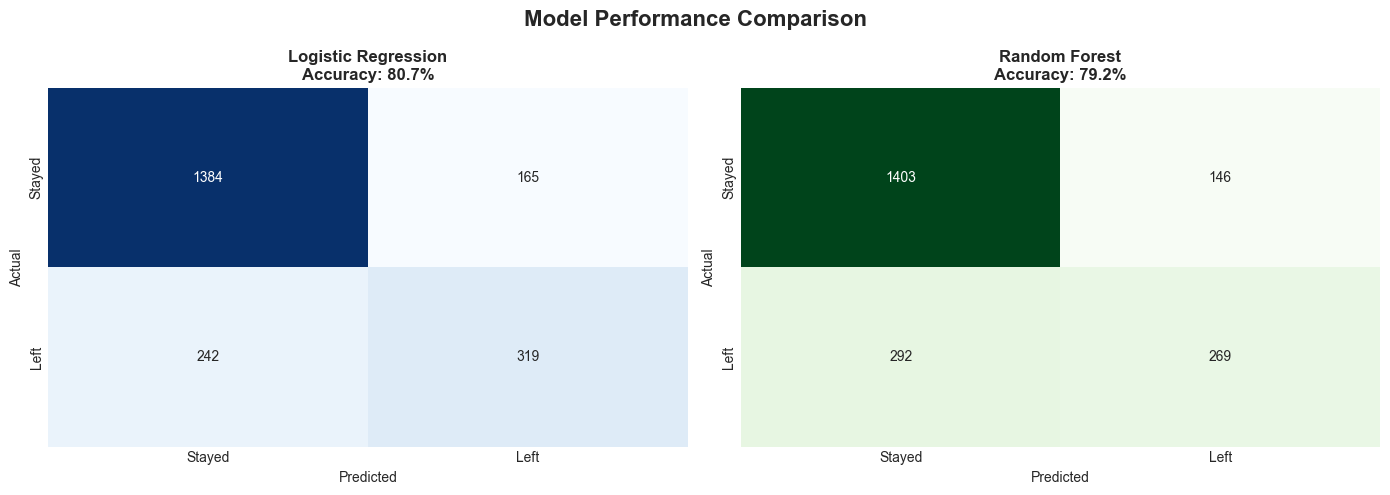

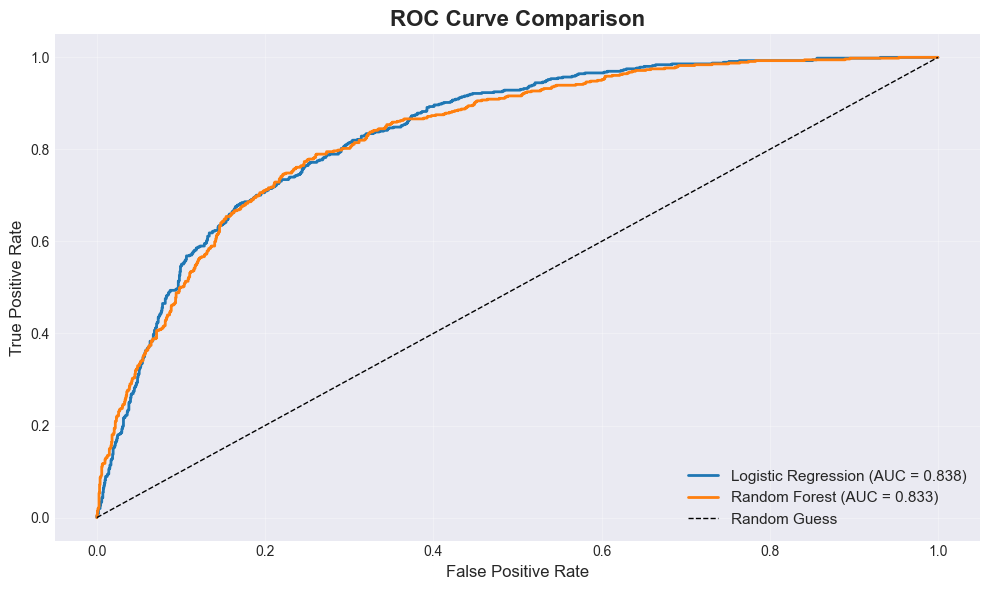

In [40]:
# ============================================================================
# STEP 12: MODEL EVALUATION
# ============================================================================
print("\n\n📊 STEP 12: Evaluating Model Performance\n")

# Predictions
lr_pred = lr_model.predict(X_test_scaled)
rf_pred = rf_model.predict(X_test_scaled)

lr_pred_proba = lr_model.predict_proba(X_test_scaled)[:, 1]
rf_pred_proba = rf_model.predict_proba(X_test_scaled)[:, 1]

# Calculate metrics
lr_auc = roc_auc_score(y_test, lr_pred_proba)
rf_auc = roc_auc_score(y_test, rf_pred_proba)

print("LOGISTIC REGRESSION RESULTS:")
print(f"   Accuracy: {(lr_pred == y_test).mean()*100:.2f}%")
print(f"   AUC Score: {lr_auc:.3f}")
print("\nRANDOM FOREST RESULTS:")
print(f"   Accuracy: {(rf_pred == y_test).mean()*100:.2f}%")
print(f"   AUC Score: {rf_auc:.3f}")

# Confusion Matrix Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('Model Performance Comparison', fontsize=16, fontweight='bold')

# Logistic Regression
cm_lr = confusion_matrix(y_test, lr_pred)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', ax=axes[0], cbar=False)
axes[0].set_title(f'Logistic Regression\nAccuracy: {(lr_pred == y_test).mean()*100:.1f}%', fontweight='bold')
axes[0].set_ylabel('Actual')
axes[0].set_xlabel('Predicted')
axes[0].set_xticklabels(['Stayed', 'Left'])
axes[0].set_yticklabels(['Stayed', 'Left'])

# Random Forest
cm_rf = confusion_matrix(y_test, rf_pred)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', ax=axes[1], cbar=False)
axes[1].set_title(f'Random Forest\nAccuracy: {(rf_pred == y_test).mean()*100:.1f}%', fontweight='bold')
axes[1].set_ylabel('Actual')
axes[1].set_xlabel('Predicted')
axes[1].set_xticklabels(['Stayed', 'Left'])
axes[1].set_yticklabels(['Stayed', 'Left'])

plt.tight_layout()

# ROC Curve
plt.figure(figsize=(10, 6))
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_pred_proba)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_pred_proba)

plt.plot(lr_fpr, lr_tpr, label=f'Logistic Regression (AUC = {lr_auc:.3f})', linewidth=2)
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.3f})', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess', linewidth=1)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve Comparison', fontsize=16, fontweight='bold')
plt.legend(loc='lower right', fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()




🔑 STEP 13: Most Important Features for Prediction

Top 10 Most Important Features:
   tenure: 0.1874
   TotalCharges: 0.1670
   MonthlyCharges: 0.1184
   InternetService_Fiber optic: 0.0677
   PaymentMethod_Electronic check: 0.0514
   Contract_Two year: 0.0484
   OnlineSecurity_Yes: 0.0343
   Contract_One year: 0.0313
   TechSupport_Yes: 0.0284
   PaperlessBilling: 0.0225


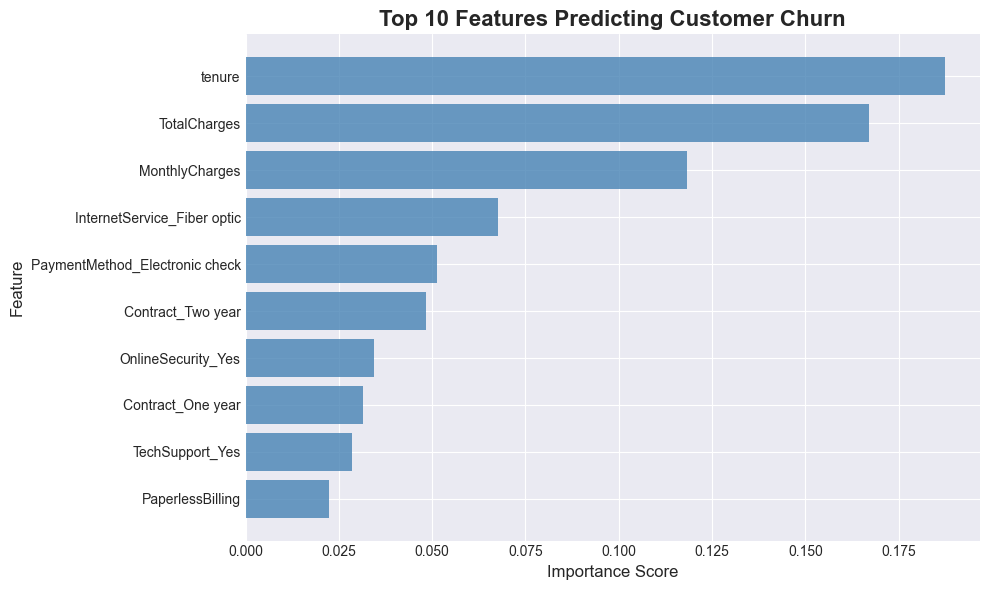

In [42]:
# ============================================================================
# STEP 13: FEATURE IMPORTANCE
# ============================================================================
print("\n\n🔑 STEP 13: Most Important Features for Prediction\n")

# Get feature importance from Random Forest
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False).head(10)

print("Top 10 Most Important Features:")
for idx, row in feature_importance.iterrows():
    print(f"   {row['Feature']}: {row['Importance']:.4f}")

# Visualize
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='steelblue', alpha=0.8)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Top 10 Features Predicting Customer Churn', fontsize=16, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()


In [43]:

# ============================================================================
# STEP 14: BUSINESS RECOMMENDATIONS
# ============================================================================
print("\n\n💼 STEP 14: Business Recommendations\n")

recommendations = [
    "1. OFFER INCENTIVES for month-to-month customers to switch to long-term contracts",
    "2. IMPROVE FIBER OPTIC SERVICE quality or pricing to reduce churn",
    "3. PROVIDE FREE TECH SUPPORT for first 6 months to new customers",
    "4. FOCUS RETENTION EFFORTS on customers in first 12 months",
    "5. CREATE SPECIAL PROGRAMS for high-paying customers to increase value perception",
    "6. ENCOURAGE automatic payment methods other than electronic checks"
]

for rec in recommendations:
    print(f"   {rec}")

print("\n\n" + "="*70)
print("✅ ANALYSIS COMPLETE!")
print("="*70)
print("\nGenerated Files:")
print("   1. 1_churn_distribution.png - Overview of churn in the dataset")
print("   2. 2_churn_drivers.png - Key factors affecting churn")
print("   3. 3_model_performance.png - Model comparison")
print("   4. 4_roc_curve.png - Model accuracy visualization")
print("   5. 5_feature_importance.png - Most important predictive features")
print("\n")




💼 STEP 14: Business Recommendations

   1. OFFER INCENTIVES for month-to-month customers to switch to long-term contracts
   2. IMPROVE FIBER OPTIC SERVICE quality or pricing to reduce churn
   3. PROVIDE FREE TECH SUPPORT for first 6 months to new customers
   4. FOCUS RETENTION EFFORTS on customers in first 12 months
   5. CREATE SPECIAL PROGRAMS for high-paying customers to increase value perception
   6. ENCOURAGE automatic payment methods other than electronic checks


✅ ANALYSIS COMPLETE!

Generated Files:
   1. 1_churn_distribution.png - Overview of churn in the dataset
   2. 2_churn_drivers.png - Key factors affecting churn
   3. 3_model_performance.png - Model comparison
   4. 4_roc_curve.png - Model accuracy visualization
   5. 5_feature_importance.png - Most important predictive features


